# Naive Bayes i Classificació


En aquest tercer lliurament es programarà un classificador, que donada una *piulada*, la categoritzarà en una de les possibles classes. En aquesta ocasió, implementareu un classificador amb *piulades* relacionades amb el *cyber bullying*.

Recordeu que l'objectiu principal d'aquesta pràctica és desenvolupar un classificador amb una *accuracy* alta.


**Què s’ha de fer?**

Volem classificar *piulades* segons a quin tipus de *cyber bullying* pertanyen. Així doncs, a partir de tots les *piulades* que tenim, crearem un vector de característiques que ens descrigui cadascuna. A continuació desenvoluparem un classificador probabilístic del tipus **Naive Bayes** que ens permeti identificar a quina classe de *cyber bullying* pertany una *piulada* donada, segons les característiques disenyades.


**Quina és la idea del sistema de classificació que s’ha de desenvolupar?**

El classificador és un concepte de l'aprenentatge automàtic supervisat. L'objectiu del classificador és donat un vector de característiques que descriuen els objectes que es volen classificar indicar a quina categoria o classe pertanyen d'entre un conjunt predeterminat.

El procés de classificació consta de dues parts:

+ el procés d'aprenentatge i
+ el procés d'explotació o testeig.

El procés d'aprenentatge rep exemples de parelles $(x,y)$ on $x$ són les característiques, usualment representades per nombres reals, i $y$ és la categoria a la que pertanyen.
Aquest conjunt se'l coneix com a conjunt d'entrenament i ens servirà per trobar una funció $\hat{y}=f(x)$ que donada una $x$ aconsegueixi que $\hat{y}$ sigui semblant $y$.

Per altra banda el procés de testeig aplica la funció $f(x)$ apresa a l'entrenament a a dades no presents en el conjunt d'aprenentatge per avaluar el classificador.

**Classificació i llenguatge natural**

La descripció dels exemples en característiques és el punt més crític de tot sistema d'aprenentatge automàtic.
Una de les representacions més simples per tal de descriure un text és la representació ["bag-of-words"](https://en.wikipedia.org/wiki/Bag-of-words_model).

Aquesta representació converteix un text en un vector de $N$ paraules.
Primer haurem de seleccionar el conjunt d'$N$ paraules que volem fer servir. Després, per cada paraula comptar quants cops apareix en el text.

Una versió alternativa i més simple d'aquest procés pot ser simplement indicar al vector si una determinada paraula apareix o no en el text.

## Abans de començar


**\+ Durant la pràctica, solament es podran fer servir les següents llibreries**:

`Pandas, Numpy, Re` i `NLTK`

Python té un paquet integrat anomenat ["re"](https://www.w3schools.com/python/python_regex.asp), que es pot utilitzar per treballar amb expressions regulars. És molt aconsellable fer servir aquest paquet per processar les paraules.

**\+ No es poden modificar les definicions de les funcions donades, ni canviar els noms de les variables i paràmetres ja donats**

Això no implica però que els hàgiu de fer servir. És a dir, que la funció tingui un paràmetre anomenat `df` no implica que l'hàgiu de fer servir, si no ho trobeu convenient.

**\+ En les funcions, s'especifica que serà i de quin tipus cada un dels paràmetres, cal respectar-ho**

Per exemple (ho posarà en el pydoc de la funció), `df` sempre serà indicatiu del `Pandas.DataFrame` de les dades. Durant els testos, els paràmetres (i específicament `df`) no contindran les mateixes dades que en aquest notebook, si bé si seran del mateix tipus! Per tant, no us refieu de què tinguin, per exemple, el mateix nombre de files.

## Les dades

El 15 d'Abril de 2020, UNICEF va llançar una alarma com a resposta de l'augment de risc de *cyber bullying* durant la pandèmia COVID-19.

Les estadístiques són prou alarmants: un 36.5% dels estudiants de l'escola fins a l'institut s'han sentit víctimes del *cyber bullying* i un 87% n'han estat testimonis, amb efectes que van des d'una disminució de resultats acadèmics fins a pensaments suïcides.

Amb l'objectiu d'ajudar a l'analisis de la situació, s'ha construit un dataset que conté més de 47000 *piulades* etiquetades d'acord amb la classe de *cyber bullying* que s'està donant:

1. `age`;
2. `ethnicity`;
3. `gender`;
4. `religion`;
5. `other type of cyberbullying`;
6. `not cyberbullying`

Les dades han estat balancejades per tal de contenir aproximadament 8000 mostres de cada classe.

# Preparar les dades

## Lectura de les dades

In [1]:
# Moduls globals per al funcionament del notebook
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

In [2]:
df = pd.read_csv('data/cyberbullying_tweets.csv', encoding='utf-8')
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [3]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

## Preparació del dataset

Dividim les *piulades* en un conjunt d'entrenament, *train*, i en un conjunt de validació, *test*, per tal de poder entrenar i validar el nostre model de classificació.

In [4]:
from sklearn.model_selection import train_test_split

df_tweets_train, df_tweets_test = train_test_split(df, test_size=0.2)

Com les dades estaven balancejades originalment, podem observar que la distribució de cadascuna de les classes es manté:

In [5]:
df_tweets_train['cyberbullying_type'].value_counts()

cyberbullying_type
religion               6415
age                    6374
ethnicity              6364
not_cyberbullying      6356
gender                 6352
other_cyberbullying    6292
Name: count, dtype: int64

In [6]:
df_tweets_test['cyberbullying_type'].value_counts()

cyberbullying_type
gender                 1621
age                    1618
ethnicity              1597
not_cyberbullying      1589
religion               1583
other_cyberbullying    1531
Name: count, dtype: int64

# Implementació

Dividirem el notebook en 3 seccions que es complementen una a l'altra:

1. Anàlisi exploratòria de les dades: Informació bàsica sobre les *piulades*.
2. Processament de les dades: Creació d'un vector de característiques a partir de les *piulades*.
3. Desenvolupament d'un classificador *Naive Bayes*.

### 1. Anàlisis de dades

El primer que haurem de fer és analitzar les dades per veure una mica com són. El que us proposem és fer una sèrie de visualitzacions per observar les dades, com ara:

* el nombre de *piulades* que s'estan dirigint a una persona en concret
* el nombre de  *hashtags* que hi ha a cada categoria de *piulades*
* el nombre de  *piulades* que hi ha de cada categoria de *piulades*
* el nombre de  *piulades* de la categoria `not_cyberbullying` que es dirigeixen a un usuari vs totes les altres categories
* altres coses que penseu que poden ser rellevants.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df_tweets_train.head()

,tweet_text,cyberbullying_type
31580,@super_trashbros https://t.co/b5HFOAtfbk,other_cyberbullying
14039,When do we get serious about impeaching Trump?...,gender
47644,this show funny as fuck...white people lookin ...,ethnicity
22573,Mostly along Iran Balochistan Border. If you s...,religion
28788,http://t.co/zToJTx0BK0,other_cyberbullying


#### **EXERCICI 1:**

* Quantes *piulades* estan dirigides a un usuari concret? Diem que una piulada va dirigida a una persona en concret si contenen el patró ``@usuari``.

[Restriccions](https://help.twitter.com/en/managing-your-account/change-twitter-handle) que imposa X sobre el patró:
+ Nomes són valids aquells patrons amb caràcters alfanumèrics ``[A-z 0-9]`` i el caràcter ``_``
+ Els patrons han de començar per ``@`` i han de tenir més de 4 i menys de 16 caràcters.

En aquest exercici és extremadament útil l'ús del mòdul ``re``.

In [9]:
def count_mentions(data):
    '''
    Compte el nombre de vegades que cada usuari ha sigut mencionat dins d'un conjunt de tweets

    Args:
        data: Pandas.Series amb els tweets

    Return:
        dict: diccionari amb el nombre de referencies per usuari {@userID: mencions}
    '''

    # Creem un defaultdict per contar les mencions de cada usuari
    mentions = defaultdict(int)

    # Definim el patro amb el que es fara la busqueda dels user ID
    pattern = re.compile(r'@[\w]{5,16}')

    # Emplenem el diccionari
    for tweet in data:
        for user in re.findall(pattern, tweet):  # Troba tots els usuaris dins del text
            mentions[user] += 1

    return dict(mentions)

count_mentions(df['tweet_text'][:10])

{'@XochitlSuckkks': 1,
 '@Jason_Gio': 1,
 '@RudhoeEnglish': 1,
 '@Raja5aab': 1,
 '@Quickieleaks': 1,
 '@stockputout': 1}

In [10]:
def trobar(tweet, patro):
    return re.findall(patro, tweet)

def count_total_mentions(data):
    patro_usuari = r'@[\w]{5,15}'
    data['usuaris'] = data['tweet_text'].apply(trobar, patro=patro_usuari)
    concrets = data[data['usuaris'].apply(lambda x: len(x) > 0)]
    print(f'Hi ha {len(concrets)} piulades dirigides a un usuari concret.')


+ Quants *hashtags* ``#`` hi ha a cada categoria de *piulades*?

Compteu els ``#`` que vagin seguits d'alguna lletra o nombre ja que, com veiem a la [normativa](https://help.twitter.com/en/using-twitter/how-to-use-hashtags) de X, els ``#`` no poden contenir cap mena de signe de puntuació.

In [11]:
def count_hastags(data):
    '''
    Compte el nombre de hastags que hi ha en cada tipus de tweet en funcio de la seva categoria

    Args:
        data: Pandas.DataFrame amb els tweets i les categories asociades
    '''

    # Creem un diccionari per guardar el recompte de hastags
    hastags = defaultdict(int)

    # Definim el patro amb el que es fara la busqueda de hastags
    pattern = re.compile(r'#[\w]+')

    # Cerquem els hastags de cada tweet i afegim el recompte a la categoria a la que pertany
    for category, tweets in zip(data['cyberbullying_type'], data['tweet_text']):
        # Agafem els hastags que hi ha als tweets
        matches = re.findall(pattern, tweets)

        # Si hi ha hastags els comptem
        if len(matches) > 0:
            hastags[category] += len(matches)

    return dict(hastags)

print(count_hastags(df))

{'not_cyberbullying': 3274, 'gender': 2694, 'religion': 1803, 'other_cyberbullying': 1629, 'age': 739, 'ethnicity': 1112}


+ Fes un histograma que representi aquesta distribució?

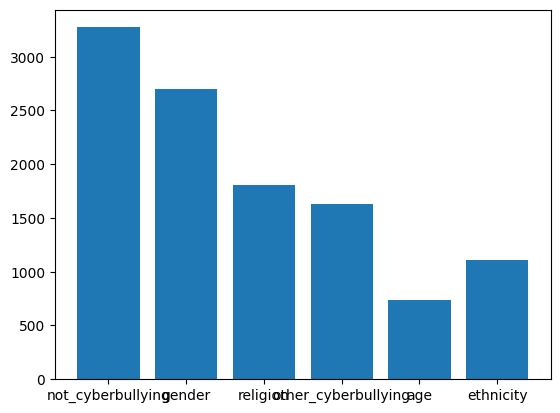

In [12]:
def show_hastags(data):
    '''
    Mostra un histograma que representa la distribucio de hastags per categoria de cyberbullying

    Args:
        data: Pandas.DataFrame amb els tweets a analitzar
    '''

    # Comptem els hastags dels tweets clasificats per categories
    hastags = count_hastags(data)

    # Agafem totes les categories i el nombre de hastags contabilitzats per cada una
    labels, values = hastags.keys(), hastags.values()

    # Generem l'histograma
    plt.bar(labels, values, align='center')

    # Visualitza l'histograma
    plt.show()

show_hastags(df)

+ Comproveu a continuació quantes vegades hi ha un ús invàlid dels ``#``, per exemple ``##`` o ``#@``, on, si no tinguessim en compte la restriccio imposada, hauriem contat 2 ``#`` a ``##`` o 1 ``#`` a ``#@``, quan en realitat son 1 i 0 respectivament.

In [13]:
def count_invalid_hastags(data):
    '''
    Compte el nombre de hastags invalids usats per usuaris

    Args:
        data: Pandas.Series amb els tweets a estudiar
    '''

    # Inicialitzem el comptador
    invalid_hastags = 0

    # Definim el patro de busqueda per als hastags invalids
    pattern = re.compile(r'#[^\w]+')

    # Cercem hastags invalids atraves de tots els tweets
    for text in data:
        for invalid in re.findall(pattern, text):
            invalid_hastags += 1

    return invalid_hastags

count_invalid_hastags(df['tweet_text'])

68

+ Quantes *piulades* vàlides hi ha de cada categoria?

In [14]:
def count_valid_tweets(data):
    '''
    Compte el nombre de tweets valids (que no continguin hastags ni users ID invalids) per categoria

    Args:
        data: Pandas.DataFrame amb els tweets i les categories
    '''

    # Creem un diccionari per guardar el recompte de tweets valids per categoria
    valid_tweets = defaultdict(int)

    # Definim el patro per buscar hastags o users ID invalids
    pattern = re.compile(r'(#[^a-zA-Z0-9]+ | @\W+)')

    # Cerquem per tweets valids a traves de tots els tweets
    for category, text in zip(data['cyberbullying_type'], data['tweet_text']):
        if not re.findall(pattern, text):  # Si no es troba cap hastag ni user ID invalid considerem el tweet com valid
            valid_tweets[category] += 1

    return dict(valid_tweets)

print(count_valid_tweets(df))

{'not_cyberbullying': 7932, 'gender': 7963, 'religion': 7991, 'other_cyberbullying': 7807, 'age': 7984, 'ethnicity': 7957}


+ Quantes *piulades* de la categoria `not_cyberbullying` és dirigeixen a un usuari?
+ Quantes *piulades* de totes les altres categories és dirigeixen a un usuari?

In [15]:
def count_mentions_by_category(categories, data, invert_selection=False):
    '''
    '''

    # Creem un defaultdict per contar les mencions de cada usuari
    mentions = defaultdict(int)

    # Definim el patro amb el que es fara la busqueda dels user ID
    pattern = re.compile(r'@[\w]{5,16}')

    if invert_selection:
        grouped_data = data[~data['cyberbullying_type'].isin(categories)]['tweet_text']
    else:
        grouped_data = data[data['cyberbullying_type'].isin(categories)]['tweet_text']

    # Emplenem el diccionari
    for tweet in grouped_data:
        for user in re.findall(pattern, tweet):  # Troba tots els usuaris dins del text
            mentions[user] += 1

    return dict(mentions)

count_mentions_by_category(['not_cyberbullying'], df)

{'@XochitlSuckkks': 1,
 '@Jason_Gio': 4,
 '@RudhoeEnglish': 3,
 '@Raja5aab': 2,
 '@Quickieleaks': 2,
 '@stockputout': 3,
 '@Jord_Is_Dead': 1,
 '@Kurdsnews': 1,
 '@yasmimcaci': 1,
 '@Bferrarii': 1,
 '@sarinhacoral': 1,
 '@Victor_Maggi': 1,
 '@0xabad1dea': 7,
 '@kelseytheodore2': 2,
 '@halalcunty': 5,
 '@biebervalue': 30,
 '@liamxkiwi': 5,
 '@greenlinerzjm': 45,
 '@halalflaws': 41,
 '@scottyswaggod': 2,
 '@sand_dejesus': 1,
 '@O_Patriarca': 1,
 '@gcarothers': 1,
 '@MaxBlumenthal': 41,
 '@cpassevant': 1,
 '@anadumitrescu13': 1,
 '@joeyBADASS_': 1,
 '@Firebomb173': 2,
 '@ANDAASONSAN': 2,
 '@KamilaaRudenko': 1,
 '@bxokrissy': 1,
 '@andythewookie1': 1,
 '@MelissaRyan': 1,
 '@m_rhee': 1,
 '@MileyCyrus': 1,
 '@JuliaAllynn': 1,
 '@janaane': 1,
 '@AlwaysVero_': 1,
 '@Giia_marengo': 1,
 '@Karol__Dance': 1,
 '@TheMajesticPlum': 1,
 '@hayhenning': 1,
 '@GlennF': 10,
 '@Spacekatgal': 34,
 '@sbrew11': 1,
 '@nader_haq': 3,
 '@MadDr11': 4,
 '@SirajZarook': 12,
 '@BilalIGhumman': 27,
 '@OdiniaInvictus':

+ Calculeu altres coses que penseu que poden ser rellevants (usuaris més mencionats, *hashtags* més comuns per cada categoria, etc.).

In [16]:
def get_most_mentioned_users(data, n):
    '''
    Retorna un diccionari amb els usuaris més mencionats i el nombre de mencions

    Args:
        data: Pandas.DataFrame amb els tweets a analitzar
        n: nombre enter de usuaris amb més mencions a retornar
    '''

    # Primer agafem totes els esments dels usuaris
    mentions = count_mentions(data['tweet_text'])

    # Ordenem els elements del diccionari de forma ascendent
    mentions = sorted(mentions.items(), key=lambda x: x[1], reverse=True)

    return dict(mentions[:n])

print(get_most_mentioned_users(df, 10))

{'@tayyoung_': 958, '@freebsdgirl': 233, '@MaxBlumenthal': 161, '@mykitchenrules': 115, '@ChrisWarcraft': 104, '@MT8_9': 101, '@TheQuinnspiracy': 101, '@IsraeliRegime': 99, '@Spacekatgal': 98, '@realDonaldTrump': 94}


### 2. Comptar paraules

In [17]:
# No modificar aquesta cel·la, s'encarrega de fer el procés més eficient.
# Intenteu entendre quà fa aquesta cel·la

def memo(f):
    class memodict(dict):
        def __init__(self, f):
            self.f = f
        def __call__(self, *args):
            return self[args]
        def __missing__(self, key):
            ret = self[key] = self.f(*key)
            return ret
    return memodict(f)

El primer que haurem d'implementar és la funció ``standardize`` que estandaritzarà les paraules.

#### **EXERCICI 2:**

+ Empleneu la funció següent que, donada una paraula, la estandaritzi les paraules passant tots els caràcters a minúscules.

**Observació:** Podeu considerar diverses possibilitats per aquesta funció:
* Només canviar les lletres majúscules per minúscules
* Eliminar tots els símbols que no siguin @, # i _ (i substituïr-los per un espai)
* Eliminar tots els símbols (i substituïr-los per un espai)
* etc.

El mòdul `re` de Python és especialment útil en aquest punt.

Trieu aquella possibilitat que dóna millor resultats a l'exercici 7!

In [18]:
@memo
def standardize(word):
    """
    :param word: paraula a estandaritzar
    :return : paraula estandaritzada
    """

    # Convertim les majuscules a minuscules
    word = word.lower()

    # Eliminem els símbols que no siguin de l'abecedari, '@', '#' o '_'
    word = re.sub(r'[^a-z@#_ ]', '', word)

    return word

In [19]:
standardize("Taller DELS noUS USOS")

'taller dels nous usos'

#### **EXERCICI 3:**

+ Feu una funció ``count_words`` que construeixi un diccionari que contingui totes les paraules que s'han trobat al dataset, tot indicant el total de cops que ha aparegut cadascuna i el nombre de piulades on apareix.

El resultat ha de ser un diccionari d'aquest tipus (no necessàriament amb aquest valors):

```python
{
    'memory' : {'n_ocur': 88, 'n_piu': 76},
    'best': {'n_ocur': 123, 'n_piu': 65},
    ...
}
```

In [20]:
def count_words(df):
    """
    :param df: DataFrame amb les piulades i la informació associada
    :return : Diccionari amb el format {word : {n_ocur: valor, n_tweets: valor}, ...}
    """

    # Creem un diccionari per guardar el recompte
    dicc = defaultdict(lambda: {'n_ocur': 0, 'n_tweets': 0})

    # Definim el patro per buscar paraules
    pattern = re.compile(r'[a-zA-Z]+')

    # Cerquem per tots els tweets
    for tweet in df['tweet_text']:
        # Creem un set per comprobar quan una paraula apreix en un tweet diferent
        unique_words = set()

        # Busquem totes les paraules del tweet
        for word in re.findall(pattern, tweet):
            # Per fer el recompte estandaritzem les paraules
            word = standardize(word)

            # Comprobem si la paraula ja ha sigut llegida
            if word not in unique_words:
                unique_words.add(word)
                dicc[word]['n_tweets'] += 1

            dicc[word]['n_ocur'] += 1  # Incrementem el nombre de ocurrencies

    return dict(dicc)

In [21]:
dicc_text = count_words(df_tweets_train)
print (len(dicc_text))
print("'rape':",dicc_text['rape'])

50844
'rape': {'n_ocur': 3560, 'n_tweets': 3266}


### 3. Comptar paraules per cada categoria de piulada

In [22]:
df_tweets_train.head()

,tweet_text,cyberbullying_type
31580,@super_trashbros https://t.co/b5HFOAtfbk,other_cyberbullying
14039,When do we get serious about impeaching Trump?...,gender
47644,this show funny as fuck...white people lookin ...,ethnicity
22573,Mostly along Iran Balochistan Border. If you s...,religion
28788,http://t.co/zToJTx0BK0,other_cyberbullying


#### **EXERCICI 4:**

+ Fent servir la funció que se us dona a continuació (`eachTopic`), apliqueu-la per tal de comptar les paraules que s'han trobat i la seva ocurrència segregant ara per categoria.

El resultat ha de ser un diccionari d'aquest tipus (no necessàriament amb aquest valors):

```python
{
    'ethnicity': {
        'race' : {'n_ocur': 88, 'n_piu': 76},
        'what': {'n_ocur': 123, 'n_piu': 65}
        ...
    },
    ...
    'gender': {
        'jokes' : {'n_ocur': 18, 'n_piu': 17},
        'you': {'n_ocur': 154, 'n_piu': 66}
    }
    ...
}
```

In [23]:
def count_words_categories(df):
    """
    Funció que ha de constuir un diccionari que conté la freqüència de les
    paraules i el número de piulades on ha aparegut.
    Aquesta informació ha de ser dividida per diferents categories de cyberbullying.

    :param df: DataFrame amb les piulades i la informació associada
    :return : Diccionari amb el format {label : {word : {n_ocur: valor, n_news: valor} } }
    """

    def eachTopic(group):
        # Count words on this topic and save to dictionary
        words_topic[group['cyberbullying_type'].iloc[0]] = count_words(group)

    # Creem un diccionari per guardar el nombre de aparicions i el nombre de tweets on apareixen
    words_topic = {}

    # Separem els tweets per categories
    grouped_tweets = df.groupby('cyberbullying_type')

    # Fem el recompte de les paraules
    for group, tweets in grouped_tweets:
        eachTopic(tweets)

    return words_topic


In [24]:
words_categories = count_words_categories(df_tweets_train)
print ("Categories:", len(words_categories))
print ("La paraula 'muslims' a la categoria 'religion':", words_categories["religion"]['muslims'])

Categories: 6
La paraula 'muslims' a la categoria 'religion': {'n_ocur': 1960, 'n_tweets': 1718}


### 4. Paraules més freqüents a les piulades


**El problema de com escollir el vector de carecterístiques**

L'elecció de les paraules que formen el vector de característiques és un pas crític. En funció de com de bona sigui aquesta descripció, millor funcionarà el sistema. Tot i que us deixem a vosaltres la política de creació del vector de característiques us donem una pista: una possible estratègia és agafar aquelles paraules que apareixen entre en un 10 i un 50 percent del total de piludades (sense tenir en compte la categoria). És a dir, paraules que no són ni massa freqüents ni massa poc. Podeu experimentar variant aquests valors.

Una altra estratègia interessant és eliminar "stop words".

#### **EXERCICI 5:**

+ Feu una funció ``topNwords`` que crei un diccionari amb les N paraules més representatives (les que apareixen amb més freqüència) de cadascuna de les categories de *cyberbullying* (Tenint en compte que haureu tret aquelles paraules que apareixen en la majoria de piulades, així com també, les que únicament apareixen en un conjunt molt petit de piulades). Una pista de que aneu ben encaminats es que per cadascuna de les categories de *cyberbullying* obtingueu paraules rellevants per aquesta. Si no es així, vol dir que heu d'incrementar el nombre de paraules a saltar (*skip_top*).

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    'age': ['school', 'high', ...],
    ...
    'religion': ['muslims', 'christian',...]
    ...
}
```

+ Experimenteu omplint la llista `skip_top` amb aquelles paraules que penseu no tenen significat o relevancia per definir cada categoria. Podeu buscar informació sobre **stop words** a internet i definir varies llistes fins que penseu que obteniu una bona representació de paraules per categoria de `cyberbullying`.

In [25]:
import nltk
nltk.download("stopwords")

skip_top = ("hi", "bye","like","one","im","got","middle","get","would","dont","amp","know","back","didnt","never","time","mean",
  "really","even","still","think",'go','made','also','always','went','every','used','u','said','see','make','look',
  'getting','day','way','everyone','much','say','good','cant','want','white','youre','someone','rt','ur','called',
  'first','anything','disgusting','yall','funny','mkr','making','makes','thats','kat','prison','ive','p','isnt',
  'going','need','lol','oh','andre','de','é','que','us','e','se','eu')

skip_top = np.concatenate((skip_top,nltk.corpus.stopwords.words('english')))

def topNwords(df, words, N, skip=[]):
    """
    :param df: DataFrame amb les piulades i la informació associada
    :param words: diccionari amb les paraules i la seva frequencia
    :param N: número de paraules més representatives que volem considerar
    :return : Diccionari amb el format {categoria1: llista_top_words_cat_1,
                                        categoria2: llista_top_words_cat_2, ...}
    """

    top_words = dict()

    #el vostre codi aquí
    def each_word(topic, word):
        if word not in skip:
            return words[topic][word]['n_ocur']
        return 0

    for topic in words:
        top_words[topic] = sorted(words[topic], key=lambda x: each_word(topic, x))[-N:][::-1]

    return top_words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neorefraction/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [72]:
top_words = topNwords(df_tweets_train, words_categories, 20, skip_top)
top_words

{'age': ['school',
  'high',
  'bullied',
  'bully',
  'girl',
  'girls',
  'bullies',
  'people',
  'kids',
  'friends',
  'schools',
  'life',
  'bullying',
  'years',
  'grade',
  'shit',
  'kid',
  'year',
  'black',
  'bad'],
 'ethnicity': ['fuck',
  'dumb',
  'nigger',
  'ass',
  'black',
  'niggers',
  'people',
  'obama',
  'bitch',
  'tayyoung',
  'racism',
  'past',
  'shit',
  'fucking',
  'negro',
  'colored',
  'racist',
  'nigga',
  'mad',
  'man'],
 'gender': ['rape',
  'gay',
  'jokes',
  'joke',
  'sexist',
  'people',
  'call',
  'women',
  'bitch',
  'female',
  'http',
  'men',
  'co',
  'man',
  'fucking',
  'feminazi',
  'bitches',
  'woman',
  'gays',
  'females'],
 'not_cyberbullying': ['http',
  'co',
  'bullying',
  'bully',
  'school',
  'people',
  'love',
  'women',
  'n',
  'gt',
  'https',
  'class',
  'shit',
  'twitter',
  'isis',
  'com',
  'stop',
  'well',
  'right',
  'islam'],
 'other_cyberbullying': ['co',
  'http',
  'https',
  'bully',
  'people

### 5. Vector de Característiques

#### **EXERCICI 6:**

Creeu el vector de característiques necessari per a fer l’entrenament del Naïve Bayes amb la funció ``create_features``.

El resultat serà un diccionari tipus (no necessàriament amb aquest valors):

```python
{
    0: np.array([0, 1, 1, 0, ...]),
    1: np.array([0, 1, 1, 1, ...]),
    ...
}
```

In [62]:
def create_features(df, top_words):
    """
    :params df: DataFrame amb les piulades i la informació associada
    :params top_words: ha de ser el diccionari que retorna topNWords
    :return : diccionari o pd.Series que conté un np.array per a
        cadascuna de les piulades amb el vector de característiques corresponent.
    """

    # Llista per guardar les paraules mes frecuents
    tw = []

    # Agafa les paraules mes frecuents
    for i in top_words.values():
        tw += i

    # Converteix la llista de paraules frecuents a un set per evitar repeticions
    tw = set(tw)

    # Diccionari per guardar el vector de caracteristiques de cada tweet
    dict_feat_vector = dict() #defaultdict(lambda: np.zeros(len(tw), dtype=np.byte))

    # Comprobem si les paraules frecuents apareixen en cada tweet
    for i, tweet in enumerate(df['tweet_text']):
        tweet_vector = np.zeros(len(tw), dtype = np.ubyte)
        standarized_tweet = [standardize(word) for word in tweet.split()]
        tweet_tw = []
        for pos, w in enumerate(tw):
            if w in standarized_tweet:
                tweet_vector[pos] = 1
        dict_feat_vector[df.index.tolist()[i]] = tweet_vector
    return dict_feat_vector

In [77]:
N = 30 # Aquest parametre el podem canviar i fer proves per avaluar quin és el millor valor.
words_categories = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_categories, N, skip_top)
dict_feat_vector = create_features(df_tweets_train, top_words)

117


### 6. El classificador Naïve Bayes

Un cop tenim una representació necessitem un procés d'aprenentatge que ens permeti passar de la descripció a una categoria.
En aquest lliurament farem servir el classificador Naïve Bayes.
Aquest classificador forma part de la família de classificadors probabilístics.
La sortida d'un classificador probabilístic és un valor de probabilitat donat un exemple per cadascuna de les categories.
La decisió final correspon a la categoria amb més probabilitat.


Els classificadors probabilistics Bayesians es basen en el teorema de Bayes per realitzar els càlculs per estimar la probabilitat condicionada $p(y|x)$, on $y$ és la categoria i $\mathbf x$ les característiques de l'exemple.

La fòrmula de Bayes és fàcil de deduir. Sabem que:

$$ p(\mathbf x,y) = p(\mathbf x|y)p(y) = p(y|\mathbf x)p(\mathbf x)$$
d'on podem extreure que:
$$ p(y|\mathbf x) = \frac{p(\mathbf x|y)p(y)}{p(\mathbf x)}$$


La millor categoria serà la que fa màxima la probabilitat $ p(y|\mathbf x)$ i per comparar aquests valors i saber quin és el màxim no cal calcular $p(\mathbf x)$ (que és constant). Per tant, considerarem que:
$$ p(y|\mathbf x) \approx p(y) · p(\mathbf x|y)$$


Les deduccions fins a aquest punt són vàlides per la majoria de classificadors Bayesians.
Naïve Bayes es distingeix de la resta perquè imposa una condició encara més restrictiva.
Considerem $\mathbf x=(x_1, \cdots, x_n)$ un conjunt d'$N$ variables aleatòries (en el nostre cas, les paraules seleccionades).
Naïve Bayes assumeix que la probabilitat de la presència d'una paraula en una piulada és independent de la presència d'una altra i per tant podem escriure:
$$p(x_1,x_2,...,x_N | y) = p(x_1|y)p(x_2|y)...p(x_N|y)$$


Podem interpretar l'anterior equació de la següent forma: La probabilitat de que una piuldad descrita pel vector de característiques (0,1,0,1,1,1) sigui de la classe "gender" és proporcional al producte de la probabilitat que la primera paraula del vector no aparegui en les piulades sobre "gender" per la probabilitat que la segona paraula sí que hi aparegui, etc.


**Estimant les probabilitats marginals condicionades**

L'últim pas que ens queda és trobar el valor de les probabilitats condicionades.
Farem servir la representació de $0$'s i $1$'s indicant que la paraula no apareix (0) o sí apareix (1) a la piulada.

Per trobar el valor de la probabilitat condicionada farem servir una aproximació freqüentista a la probabilitat.
Això vol dir que calcularem la freqüència d'aparició de cada paraula per a cada categoria.
Aquest càlcul es fa dividint el nombre de piulades de la categoria en que apareix la paraula pel nombre total de piulades d'aquella categoria.

En general:
$$p(x = \text{"school"} | y = C)= \frac{A}{B} $$
on $A$ és el número de piulades de la categoria $C$ on hi apareix la paraula 'school' i $B$ és el número total de piulades de la categoria $C$.


#### Punts delicats a tenir en compte.

**El problema de la probabilitat 0**

Si us hi fixeu bé, la probabilitat pot ser 0!!  Això vol dir, que si en una piulada no hi apareix una paraula, no pot ser classificada com cap tipus de *cyber bullying* (la presència del 0 al producte fa que el resultat sigui 0).

No sembla raonable que s'assigni o no en aquesta categoria segons si en la piulada hi apareix o no una única paraula.
Per tant, el que s'acostuma a fer és donar una baixa probabilitat en comptes de zero.

Una de les possibles solucions es fer servir la correcció de Laplace. Seguint l'exemple anterior la correcció de Laplace és:

$$p(x= \text{"school"} | y = 'C' ) = \frac{A+1}{B+M}$$

on $M$ és el nombre de categories.

**El problema de l'"underflow"**

La valor que hem de calcular en el Naive Bayes és el resultat d'un producte.
El nombre de caractéristiques del vector és el nombre de termes del producte.
Aquests nombres són iguals o menors a 1 i n'hi ha molts, si els multipliquem entre ells el resultat serà massa petit per a representar-lo en un nombre de punt flotant i el càlcul acabarà sent reduït a zero.

Per solucionar aquest problema en comptes d'operar fent multiplicacions, se sol passar a l'escala logarítmica i allà operar fent servir sumes en comptes de multiplicacions.

#### **EXERCICI 7:**

+ Implementeu la funció d'aprenentatge del classificador Naïve Bayes (funció ``naive_bayes_learn()``) que retorni un diccionari amb estructura `{categoria: [P0, ..., PN]}` on la llista representa la probabilitat
marginal condicionada de cada paraula del vector de característiques per la categoria corresponent.

+ Implementeu la funció ``naive_bayes`` que implementa el classificador. Noteu que aquesta funció está guiada i només haureu d'emplenar els espais on hem posat tres punts suspensius "#···".  

In [90]:
def naive_bayes_learn(df, feats):
    """
    :params df: DataFrame amb les piulades i la informació associada
    :params feats: vector de característiques de cada piulada
    :return : probabilitats marginals condicionades
    """


    probs = defaultdict(lambda: [0 for _ in range(len(feats))])

    probs['age']

    # Contamos el numero de tweets validos en cada categoria
    valid_tweets = count_valid_tweets(df)

    for tweet in

    return probs

naive_bayes_learn(df_tweets_train, dict_feat_vector[0])

117


defaultdict(<function __main__.naive_bayes_learn.<locals>.<lambda>()>,
            {'age': [0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
    

In [ ]:
import sys
from IPython import embed
def naive_bayes(df_train, feat_train, feat_test=None, df_test=None):
    """
    Funció que implementa el clasificador Naive_Bayes.

    Si df_test no és None, ha de calcular l'encert sobre les dades de test. És a dir,
    després de classificar feat_test ha de comparar la classificació amb la classe
    real i dir (print) quin percentatge d'encert ha obtingut.

    :param df_train: DataFrame amb les piulades que s'utilitzaran per l'entrenament
    :param feat_train: Diccionari amb els vectors de caracteristiques de cada tweet de l'entrenament
    :param feat_test: Diccionari amb els vectors de caracteristiques de cada tweet de test
    :param df_test: DataFrame amb les piulades que s'utilitzaran pel test

    :return : Una serie on l'index correspon amb els indexos de df_test i els valors són la
              classificació retornada per Naive Bayes
    """
    probs = naive_bayes_learn(df_train, feat_train)
    p_of_cat = count_words_categories(df_train)
    p_total = len(p_of_cat.keys())

    def eachFeats(row):
        id, feat = row
        p_max = float('-inf')
        p_cat = 0

        for category in probs:
            # Speed up by using numpy
            # inv is the inverse of features, 0 where 1 and 1 where 0
            # ...

            # Probs * feats is the probability of being there, while
            # inv - inv * feat = 1 - (0, 1, 0... inverses) * probs, probability of not being there
            # ...

            # Sum of logs [vs] underflow caused by mul of probs
            # ...

            # Take the max, do it now to avoid extra-loops
            # ...
        return id, p_cat

    data = map(eachFeats, feat_test.items())
    data = pd.Series(dict(data))
    correct = data == df_test['cyberbullying_type']
    print("Accuracy: {}".format(correct.sum() / correct.size))

    return correct.sum() / correct.size

In [ ]:
N = 20 # Aquest parametre el podeu canviar i fer proves per avaluar quin és el millor valor.

words_topics = count_words_categories(df_tweets_train)
top_words = topNwords(df_tweets_train, words_topics, N, skip_top)

feat_train = create_features(df_tweets_train, top_words)
feat_test = create_features(df_tweets_test, top_words)

In [ ]:
accuracy = naive_bayes(df_tweets_train, feat_train, feat_test, df_tweets_test)

Haurieu d'obtenir una precisió del 67-70%.

#### **EXERCICI 8:**

El possible procediment per tal d'aconseguir una major precisió seria el següent:
+ Es poden implementar diverses maneres d'escollir quines *stopwords* volem eliminar en les piuldades per a que no formin part dels vectors de característiques.
+ Avaluar quin conjunt d'*stopwords* retorna una precisió major per a N=40.
+ Un cop tinguem el vector d'*stopwords* amb millors resultats, el testejarem per a diferents $N$'s per a veure quina és el nombre de *stopwords* òptim.

Feu una cerca a Intenet per trobar més estratègies i intenteu millorar l'*accuracy* que heu acosneguit fins ara.

Amb això podeu arribar a precisions superiors al 80%.